In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
data = pd.read_csv('data/results.csv')

In [3]:
def calculate_statistics(group):
    stats = {}
    stats['mean'] = group['duration'].mean()
    stats['median'] = group['duration'].median()
    stats['std_dev'] = group['duration'].std()
    stats['variance'] = group['duration'].var()

    n = len(group)
    if n > 1:
        se = stats['std_dev'] / np.sqrt(n)
        ci = norm.interval(0.95, loc=stats['mean'], scale=se)
        stats['conf_interval'] = ci
    else:
        stats['conf_interval'] = (stats['mean'], stats['mean'])
    return pd.Series(stats)

In [4]:
task_stats = data.groupby('task').apply(calculate_statistics)
task_stats = task_stats.loc[[1, 2, 3, 4, 7]]
print(task_stats)

           mean  median    std_dev    variance  \
task                                             
1     23.605833  15.560  25.809941  666.153034   
2     12.060000   5.710  25.835440  667.469974   
3     12.500435   8.190  14.291400  204.244113   
4     27.837391  15.740  25.726542  661.854984   
7     23.239500  17.515  15.558815  242.076731   

                                 conf_interval  
task                                            
1       (13.279896231762867, 33.9317704349038)  
2     (1.7238610955768063, 22.396138904423196)  
3      (6.659814836567821, 18.341054728649564)  
4      (17.32344887263897, 38.351333736056674)  
7     (16.420673873760084, 30.058326126239916)  


In [5]:
overall_stats = calculate_statistics(data)
print(overall_stats)

mean                                            19.724035
median                                             11.065
std_dev                                         22.861576
variance                                       522.651646
conf_interval    (15.527394018754304, 23.920676156684284)
dtype: object


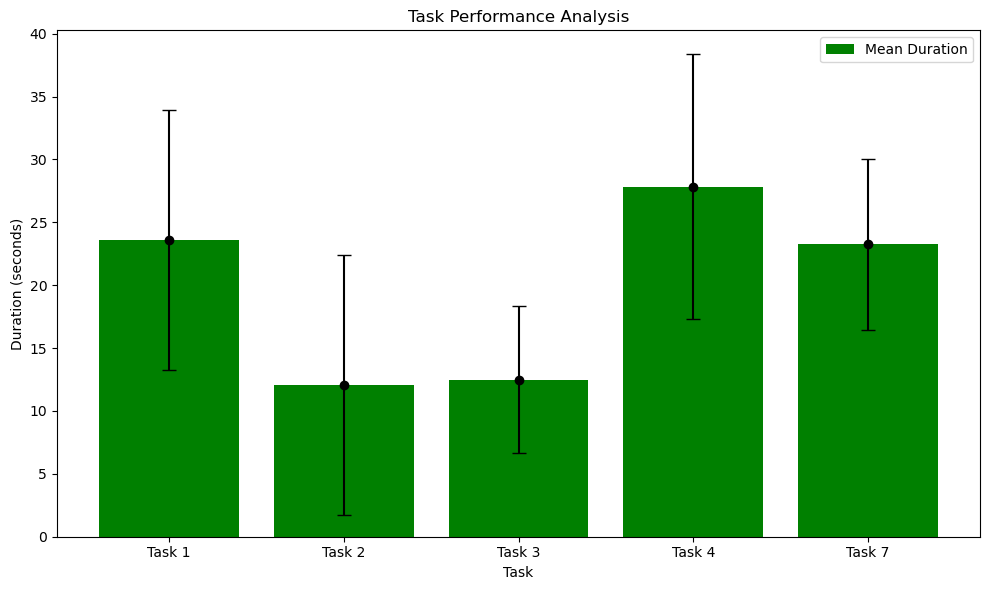

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

positions = np.arange(len(task_stats))
ax.bar(positions, task_stats["mean"], color="green", label="Mean Duration")

for i, (mean, ci) in enumerate(zip(task_stats["mean"], task_stats["conf_interval"])):
    ax.errorbar(
        positions[i],
        mean,
        yerr=[[mean - ci[0]], [ci[1] - mean]],
        fmt="o",
        color="black",
        capsize=5,
    )

ax.set_title("Task Performance Analysis")
ax.set_xlabel("Task")
ax.set_ylabel("Duration (seconds)")
ax.set_xticks(positions)
ax.set_xticklabels([f"Task {i}" for i in task_stats.index])
ax.legend()

plt.tight_layout()
plt.show()

In [7]:
unique_tasks = data['task'].unique()

In [8]:
task_names = pd.read_csv("data/tasks.csv")
task_dict = dict(zip(task_names["id"], task_names["name"]))

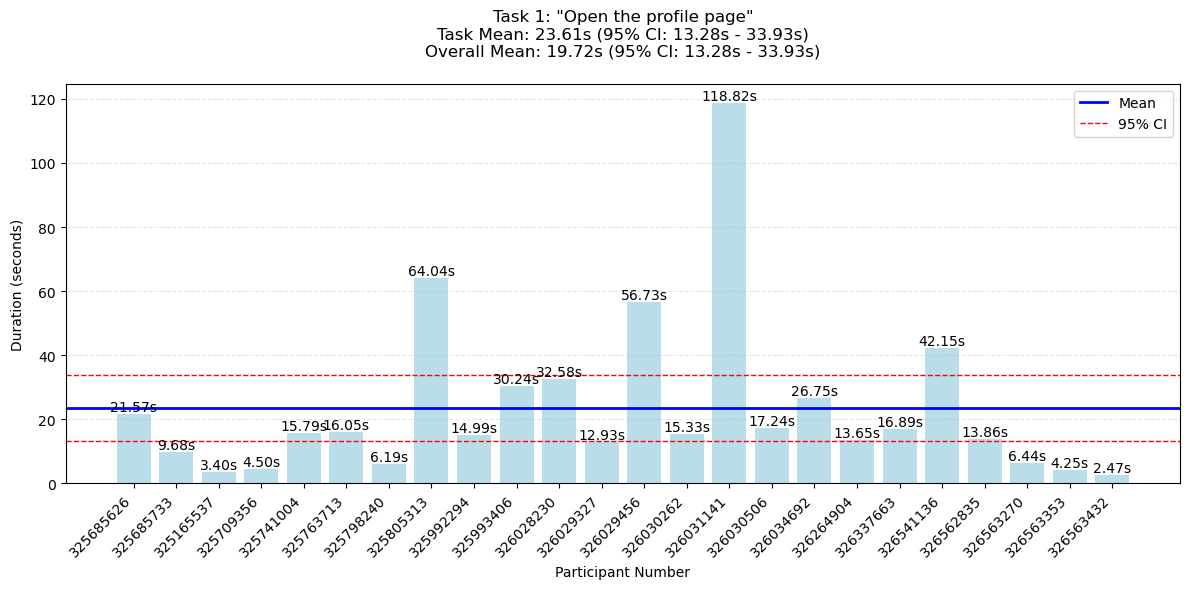

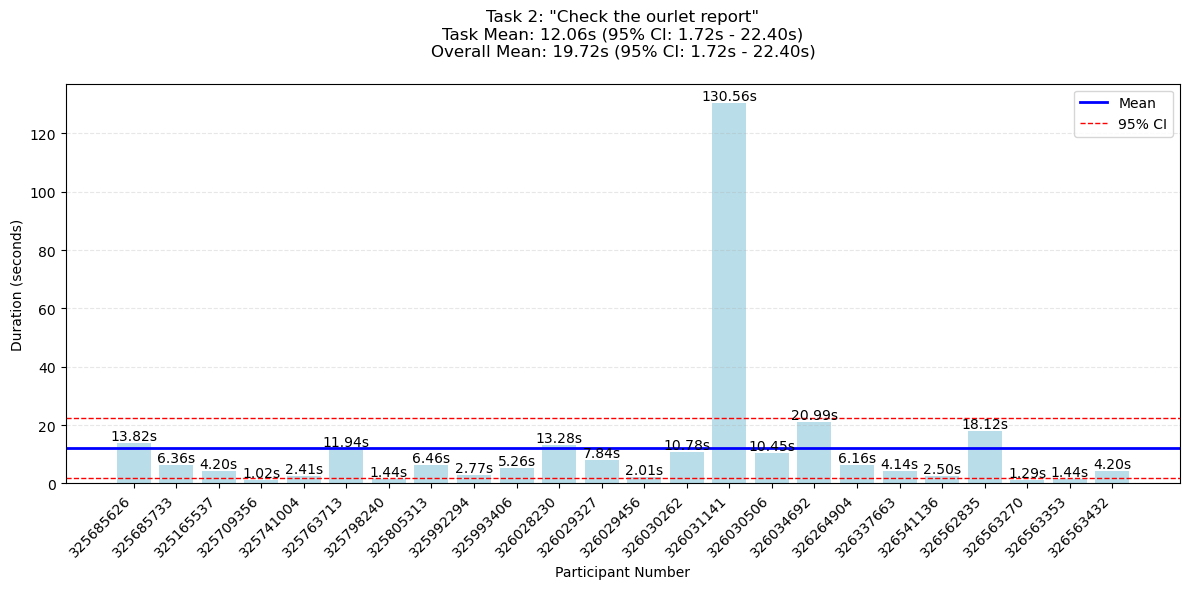

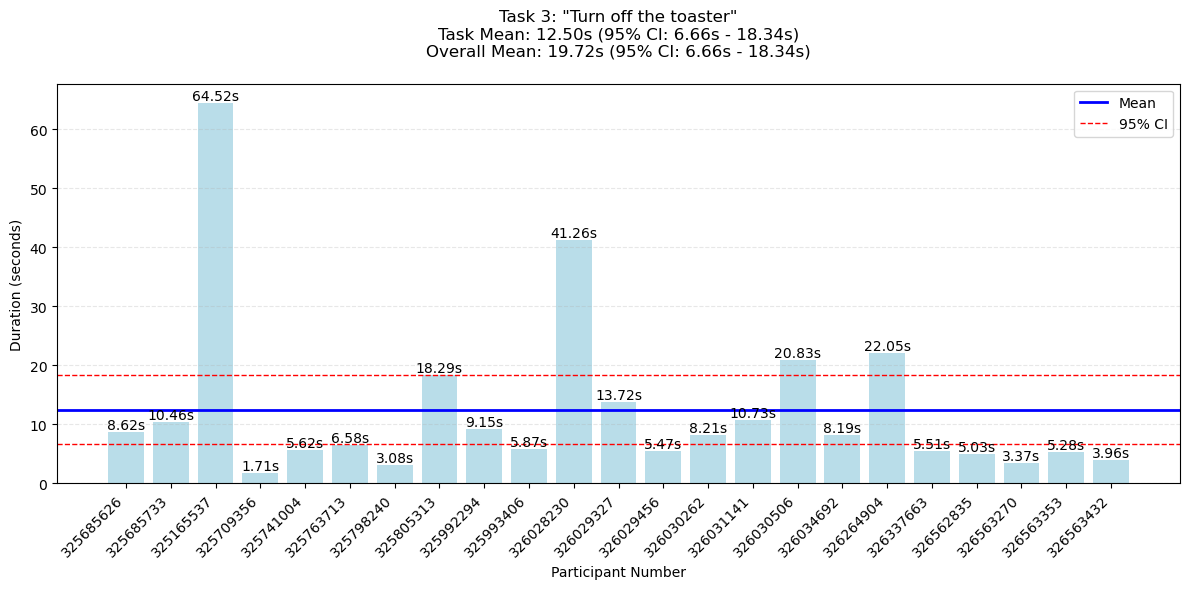

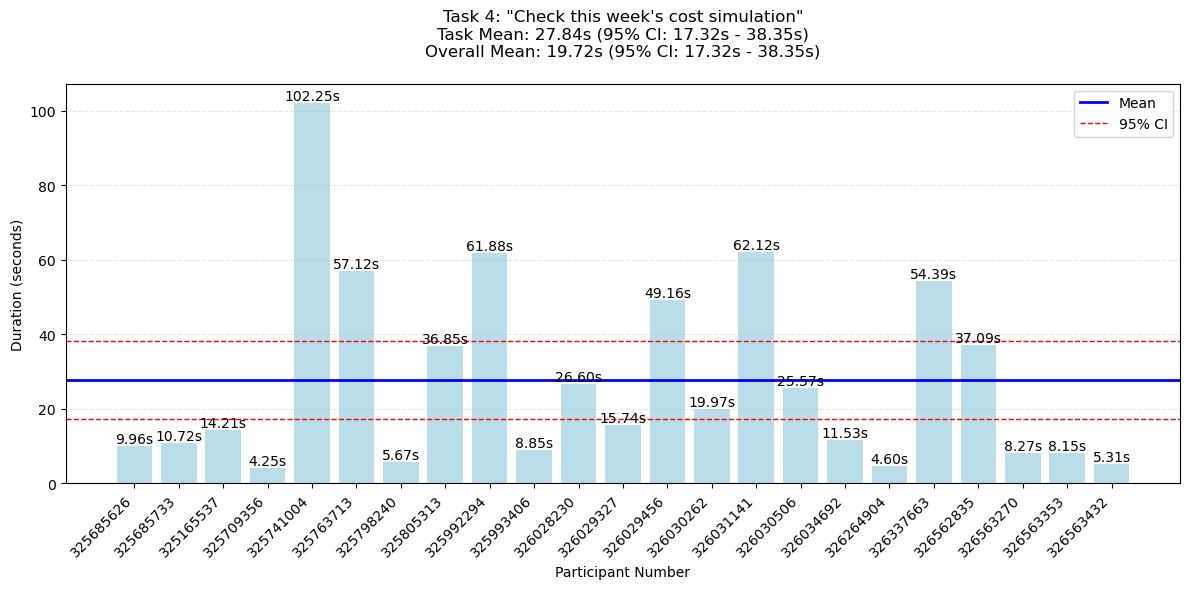

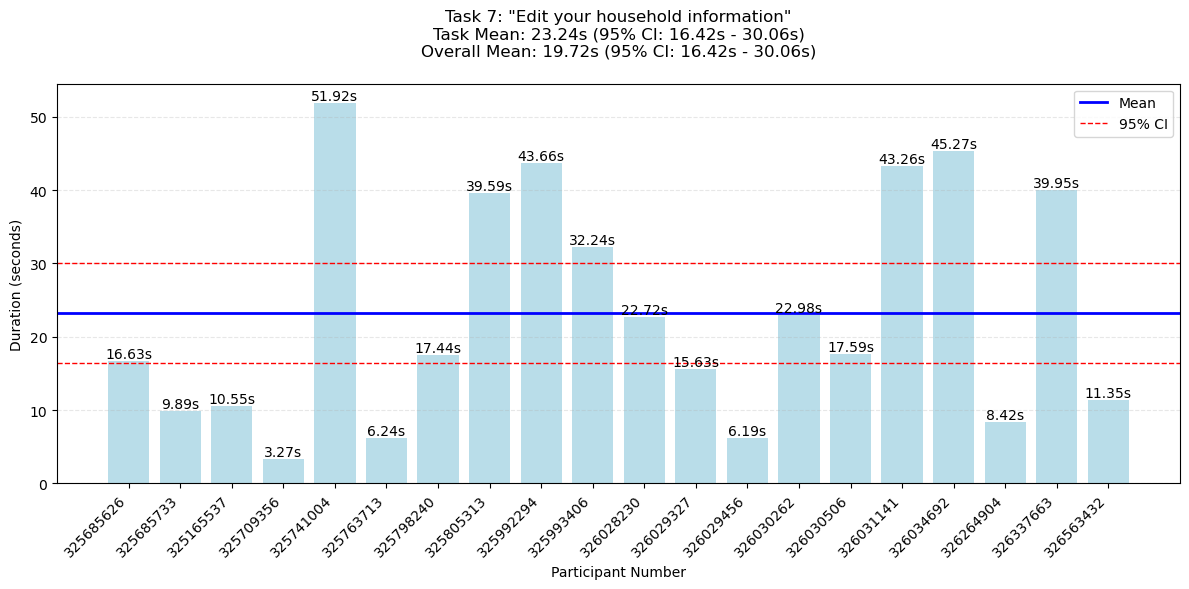

In [9]:
for task in unique_tasks:
    task_data = data[data["task"] == task]
    task_name = task_dict.get(task, f"Task {task}")

    mean_duration = task_data["duration"].mean()
    std_dev = task_data["duration"].std()
    n = len(task_data)

    if n > 1:
        se = std_dev / np.sqrt(n)
        ci = norm.interval(0.95, loc=mean_duration, scale=se)
    else:
        ci = (mean_duration, mean_duration)

    plt.figure(figsize=(12, 6), dpi=100)
    bars = plt.bar(
        range(len(task_data)), task_data["duration"], color="lightblue", alpha=0.85
    )
    plt.axhline(mean_duration, color="blue", linestyle="-", linewidth=2, label="Mean")
    plt.axhline(ci[0], color="red", linestyle="--", linewidth=1, label="95% CI")
    plt.axhline(ci[1], color="red", linestyle="--", linewidth=1)
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.2f}s",
            ha="center",
            va="bottom",
        )

    plt.title(
        f'Task {task}: "{task_name}"\n'
        + f'Task Mean: {task_stats.loc[task, "mean"]:.2f}s (95% CI: {ci[0]:.2f}s - {ci[1]:.2f}s)\n'
        + f'Overall Mean: {overall_stats["mean"]:.2f}s (95% CI: {ci[0]:.2f}s - {ci[1]:.2f}s)',
        pad=20,
    )
    plt.xlabel("Participant Number")
    plt.ylabel("Duration (seconds)")
    plt.xticks(range(len(task_data)), task_data["participant"], rotation=45, ha="right")
    plt.grid(True, axis="y", linestyle="--", alpha=0.3)
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()